<a href="https://colab.research.google.com/github/ffarhaaan/Machine-Learning/blob/criminaldatasetbangladesh/ANN_for_crimedataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


df = pd.read_csv("/content/crimedataset.csv")

print(df)

         Unit Name  Dacoity  Robbery  ...  Smuggling  Total  Total Cases
0              DMP       47      220  ...        144  11279        23519
1              CMP       16      108  ...         99   1016         4063
2              KMP        3        9  ...         13    826         1767
3              RMP        4       20  ...        248    587         1571
4              BMP        8       12  ...        117    289         1139
..             ...      ...      ...  ...        ...    ...          ...
175  Rangpur Range        1        2  ...         94    649         1472
176  Railway Range        0        1  ...         12     67           84
177            GMP        2        3  ...          2    135          244
178           RPMP        0        0  ...          0     68          121
179            ATU        0        0  ...          0      0            0

[180 rows x 18 columns]


In [2]:
df = df.drop('Unit Name',axis=1)


print(df)

     Dacoity  Robbery  Murder  ...  Smuggling  Total  Total Cases
0         47      220     245  ...        144  11279        23519
1         16      108      94  ...         99   1016         4063
2          3        9      29  ...         13    826         1767
3          4       20      21  ...        248    587         1571
4          8       12      19  ...        117    289         1139
..       ...      ...     ...  ...        ...    ...          ...
175        1        2      33  ...         94    649         1472
176        0        1       2  ...         12     67           84
177        2        3       3  ...          2    135          244
178        0        0       1  ...          0     68          121
179        0        0       0  ...          0      0            0

[180 rows x 17 columns]


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
print(df.corr())
pd.set_option('display.max_columns',None)
corr= df.corr()

print(corr)


                           Dacoity   Robbery  ...     Total  Total Cases
Dacoity                   1.000000  0.748234  ...  0.578663     0.842683
Robbery                   0.748234  1.000000  ...  0.664257     0.800185
Murder                    0.920223  0.729080  ...  0.729912     0.943097
Speedy Trial              0.795592  0.861237  ...  0.625861     0.814672
Riot                      0.484306  0.513325  ...  0.217352     0.381245
Woman & Child Repression  0.898406  0.760502  ...  0.718340     0.953778
Kidnapping                0.853740  0.933092  ...  0.687640     0.877412
Police Assault            0.720540  0.772794  ...  0.673188     0.756992
Burglary                  0.807843  0.933454  ...  0.714236     0.859411
Theft                     0.748732  0.948550  ...  0.719578     0.842331
Other Cases               0.893223  0.752139  ...  0.701512     0.953243
Arms Act                  0.666280  0.747475  ...  0.794586     0.806911
Explosive                 0.332099  0.595336  ...  

In [5]:
corr.columns

Index(['Dacoity', 'Robbery', 'Murder', 'Speedy Trial', 'Riot',
       'Woman & Child Repression', 'Kidnapping', 'Police Assault', 'Burglary',
       'Theft', 'Other Cases', 'Arms Act', 'Explosive', 'Narcotics',
       'Smuggling', 'Total', 'Total Cases'],
      dtype='object')

In [6]:
for item in corr.columns:
    corr.loc[(corr[item] > -0.75) & (corr[item] < 0.75), item ]=0 


print(corr)    

                           Dacoity   Robbery    Murder  Speedy Trial  Riot  \
Dacoity                   1.000000  0.000000  0.920223      0.795592   0.0   
Robbery                   0.000000  1.000000  0.000000      0.861237   0.0   
Murder                    0.920223  0.000000  1.000000      0.788730   0.0   
Speedy Trial              0.795592  0.861237  0.788730      1.000000   0.0   
Riot                      0.000000  0.000000  0.000000      0.000000   1.0   
Woman & Child Repression  0.898406  0.760502  0.955516      0.795776   0.0   
Kidnapping                0.853740  0.933092  0.848105      0.883215   0.0   
Police Assault            0.000000  0.772794  0.000000      0.000000   0.0   
Burglary                  0.807843  0.933454  0.789174      0.884884   0.0   
Theft                     0.000000  0.948550  0.000000      0.879879   0.0   
Other Cases               0.893223  0.752139  0.965294      0.809094   0.0   
Arms Act                  0.000000  0.000000  0.000000      0.00

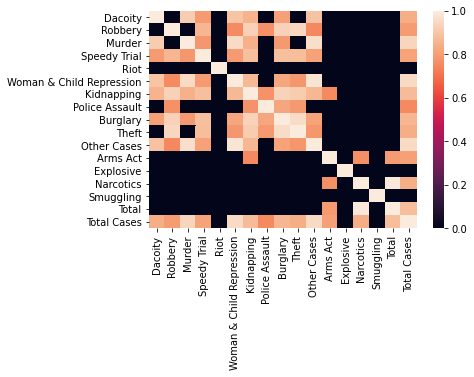

In [7]:
sns.heatmap(corr)

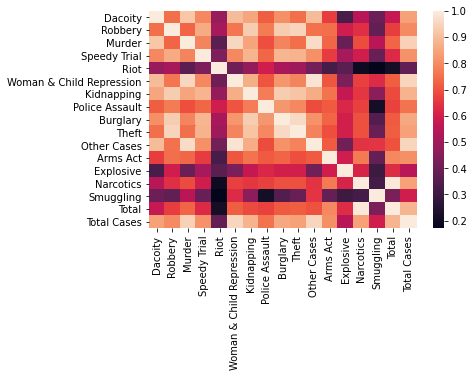

In [8]:
sns.heatmap(df.corr())

## Value Change

In [153]:
corr[corr['Theft']!=0]['Theft']

Robbery                     0.948550
Speedy Trial                0.879879
Woman & Child Repression    0.786279
Kidnapping                  0.914925
Police Assault              0.792943
Burglary                    0.958328
Theft                       1.000000
Other Cases                 0.783080
Total Cases                 0.842331
Name: Theft, dtype: float64

In [36]:
df= df.drop(['Riot',
       'Explosive', 'Narcotics',
       'Smuggling', 'Total', 'Total Cases'],axis=1)

KeyError: ignored

In [154]:
print(df)

     Dacoity  Robbery  Murder  Speedy Trial  Woman & Child Repression  \
0         47      220     245           363                      1370   
1         16      108      94            31                       455   
2          3        9      29            25                       153   
3          4       20      21             9                       157   
4          8       12      19            21                       112   
..       ...      ...     ...           ...                       ...   
175        1        2      33             0                       116   
176        0        1       2             0                         0   
177        2        3       3             1                        22   
178        0        0       1             0                        12   
179        0        0       0             0                         0   

     Kidnapping  Police Assault  Burglary  Theft  Other Cases  Arms Act  
0           139             155       555   1915 

In [155]:
df.columns

Index(['Dacoity', 'Robbery', 'Murder', 'Speedy Trial',
       'Woman & Child Repression', 'Kidnapping', 'Police Assault', 'Burglary',
       'Theft', 'Other Cases', 'Arms Act'],
      dtype='object')

## Value Change

In [156]:
tempdf = df.drop('Theft',axis= 1)

labels = df['Theft'].iloc[:].values

print(tempdf)

print(labels)
print(labels.shape)

     Dacoity  Robbery  Murder  Speedy Trial  Woman & Child Repression  \
0         47      220     245           363                      1370   
1         16      108      94            31                       455   
2          3        9      29            25                       153   
3          4       20      21             9                       157   
4          8       12      19            21                       112   
..       ...      ...     ...           ...                       ...   
175        1        2      33             0                       116   
176        0        1       2             0                         0   
177        2        3       3             1                        22   
178        0        0       1             0                        12   
179        0        0       0             0                         0   

     Kidnapping  Police Assault  Burglary  Other Cases  Arms Act  
0           139             155       555         7228  

In [157]:
feature = tempdf.iloc[:,:].values

print(feature)

print(feature.shape)

[[  47  220  245 ...  555 7228  518]
 [  16  108   94 ...  123 1831   51]
 [   3    9   29 ...   65  551   19]
 ...
 [   2    3    3 ...    2   65    3]
 [   0    0    1 ...    0   33    0]
 [   0    0    0 ...    0    0    0]]
(180, 10)


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,labels, test_size = 0.1, random_state = 42)

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [160]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential

In [161]:
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(15, activation = 'relu', input_dim = 10))

# Adding the second hidden layer
model.add(Dense(units = 10, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 8, activation = 'relu'))

# Adding the fourth hidden layer
model.add(Dense(units = 8, activation = 'relu'))

# Adding the fifth hidden layer
model.add(Dense(units = 4, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))
model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
Total params: 526
Trainable params: 526
Non-trainable params: 0
________________________________________________________

In [162]:

# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size = 162, epochs = 1500)

y_pred = model.predict(X_test)

Epoch 1/1500
1/1 [==============================] - 1s 545ms/step - loss: 387044.4062
Epoch 2/1500
1/1 [==============================] - 0s 5ms/step - loss: 387035.6562
Epoch 3/1500
1/1 [==============================] - 0s 7ms/step - loss: 387030.1562
Epoch 4/1500
1/1 [==============================] - 0s 5ms/step - loss: 387025.9375
Epoch 5/1500
1/1 [==============================] - 0s 3ms/step - loss: 387021.8125
Epoch 6/1500
1/1 [==============================] - 0s 7ms/step - loss: 387017.0938
Epoch 7/1500
1/1 [==============================] - 0s 5ms/step - loss: 387012.4062
Epoch 8/1500
1/1 [==============================] - 0s 7ms/step - loss: 387007.5938
Epoch 9/1500
1/1 [==============================] - 0s 5ms/step - loss: 387002.6250
Epoch 10/1500
1/1 [==============================] - 0s 6ms/step - loss: 386997.3125
Epoch 11/1500
1/1 [==============================] - 0s 5ms/step - loss: 386991.6562
Epoch 12/1500
1/1 [==============================] - 0s 4ms/step - loss:

## Value Change

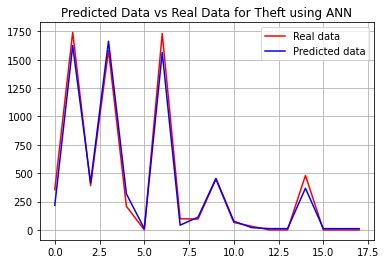

In [163]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.grid()
plt.title('Predicted Data vs Real Data for Theft using ANN')
plt.legend()
plt.show()

dict_keys(['loss'])


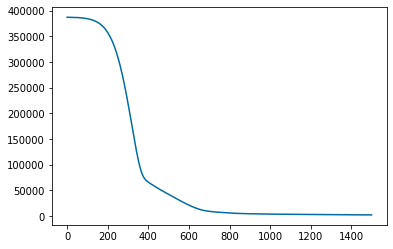

In [164]:
print(history.history.keys())

plt.plot(history.history['loss'])

## ANN Accuracy

In [165]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("r2_score",metrics.r2_score(y_test, y_pred))

r2_score 0.9847621075582127


In [166]:


# Model Accuracy: how often is the classifier correct?
print("mean_absolute_error",metrics.mean_absolute_error(y_test, y_pred))

mean_absolute_error 51.26231447855631


In [167]:


# Model Accuracy: how often is the classifier correct?
print("explained_variance_score",metrics.explained_variance_score(y_test, y_pred))

explained_variance_score 0.98547347591576


In [171]:
from sklearn import linear_model


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_predLR = regr.predict(X_test)

## LR Accuracy

In [172]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("r2_score",metrics.r2_score(y_test, y_predLR))

r2_score 0.9671746324085293


In [173]:


# Model Accuracy: how often is the classifier correct?
print("mean_absolute_error",metrics.mean_absolute_error(y_test, y_predLR))

mean_absolute_error 80.72626369633427


In [174]:


# Model Accuracy: how often is the classifier correct?
print("explained_variance_score",metrics.explained_variance_score(y_test, y_predLR))

explained_variance_score 0.9686390579315839


In [177]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

#Create a svm Classifier
regr = SVR(kernel='linear')
regr.fit(X_train, y_train)

#Train the model using the training sets


#Predict the response for test dataset
y_predSVR = regr.predict(X_test)

##SVR Accuracy

In [178]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("r2_score",metrics.r2_score(y_test, y_predSVR))

r2_score 0.9567151862676645


In [179]:
# Model Accuracy: how often is the classifier correct?
print("mean_absolute_error",metrics.mean_absolute_error(y_test, y_predSVR))

mean_absolute_error 75.67141830625982


In [180]:
# Model Accuracy: how often is the classifier correct?
print("explained_variance_score",metrics.explained_variance_score(y_test, y_predSVR))

explained_variance_score 0.9629900293243945


**This is the cell that plots all three models predictions against the test values**

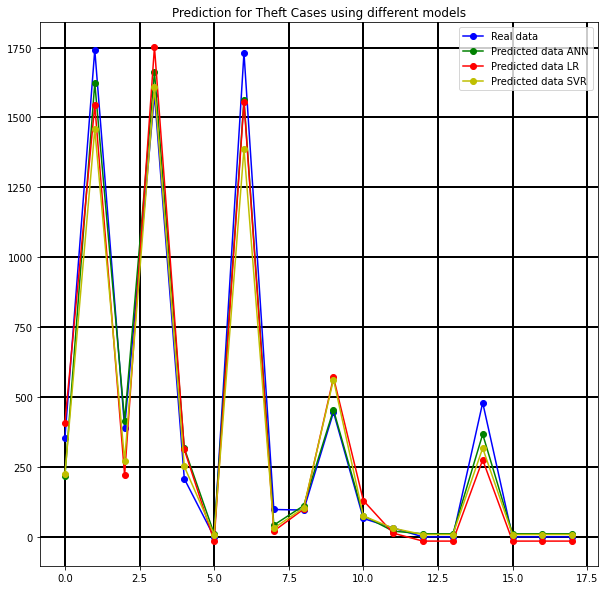

In [181]:



plt.style.use('tableau-colorblind10')
plt.figure(figsize = (10, 10))
plt.plot(y_test,'bo-', label = 'Real data')
plt.plot(y_pred,'go-', label = 'Predicted data ANN')
plt.plot(y_predLR,'ro-', label = 'Predicted data LR')
plt.plot(y_predSVR,'yo-', label = 'Predicted data SVR')
plt.grid(color='k', linestyle='-', linewidth=2)
plt.title('Prediction for Theft Cases using different models')
plt.legend()
plt.show()